In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

-----------
# Jensen-shannon divergence
The Jensen–Shannon divergence (JSD) is a symmetrized and smoothed version of the Kullback–Leibler divergence $D(P \parallel Q)$ where p might be biomdal.

$$JSD(P \parallel Q) = \frac{1}{2} (P \parallel M) + \frac{1}{2} (Q \parallel M)$$

Where $M = \frac{1}{2} (P + Q)$ is a mixture distribution of $P$ and $Q$

<br/>
$$\text{Shannon Entropy}:$$

$$ \large H(P) :=  - \sum_{x\in P} \;p(x) \; log \; p(x)$$

$$Finally:$$
$$JSD =  H(M) - \frac{1}{2} \; \left( H(P) + H(Q)\right)$$

In [3]:
# the np.linalg.norm() function is used to calculate one of the eight different matrix norms or one of the vector norms.

def jsd(p, q):
    p1 = p / np.linalg.norm(p, ord=1)
    q1 = q / np.linalg.norm(q, ord=1)
    m = 0.5 * (p1 + q1)
    r = 0.5 * (stats.entropy(p1, m) + stats.entropy(q1, m) ) 
    return r
     

In [4]:
df = pd.read_csv('../../Datasets/weight-height.csv', delim_whitespace=True)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
count, boundary = np.histogram(df['Height'], bins=100)

In [6]:
# Generate Ideal normal distribution to compare with
ideal = stats.norm.rvs(size=len(df['Height']), loc=df['Height'].mean(), scale=df['Height'].std())

In [7]:
icount, iboundary = np.histogram(ideal, bins=100)

In [8]:
jsd(count, icount)

0.0305703219783305

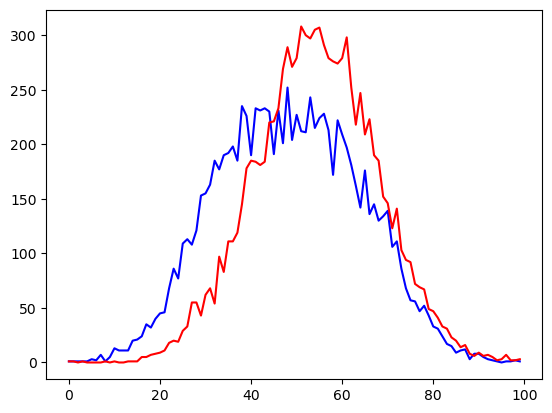

In [9]:
plt.plot(count, c='b')
plt.plot(icount, c='r')

### Interpretation:
JSD results value between **0 (identical distributions)** and **1 (completely different distributions)**, making it inherently more stable and interpretable than KLD

## JS with python libraries

implements:$$\sqrt{\frac{D(p \parallel m) + D(q \parallel m)}{2}}$$
$m$: is the pointwise mean of $p$ and $q$ <br/>
$D$: is the Kullback-Leibler divergence.

In [10]:
scipy.spatial.distance.jensenshannon(count, icount, base=None, axis=0)

0.17484370728833945